# BIG DATA ANALYTICS: Clustering Basic
- 직접 간단한 클러스터링 알고리즘을 만들어보도록 하겠습니다.
---

# K-means Clustering 직접구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

## 1. 데이터 셋 준비

In [2]:
COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# K 값
K=2

# 데이터셋
dataset = np.array([
    [1.0,1.0],
    [1.5,2.0],
    [3.0,4.0],
    [5.0,7.0],
    [3.5,5.0],
    [4.5,5.0],
    [3.5,4.5],
])

# 임의의 점
# centroids = np.random.randint(0,10,size=(K,dataset.shape[1]))
centroids = np.array([[0,0],[10,10]])

# 데이터가 속한 그룹
group = [dataset]

In [3]:
dataset

array([[1. , 1. ],
       [1.5, 2. ],
       [3. , 4. ],
       [5. , 7. ],
       [3.5, 5. ],
       [4.5, 5. ],
       [3.5, 4.5]])

In [4]:
group

[array([[1. , 1. ],
        [1.5, 2. ],
        [3. , 4. ],
        [5. , 7. ],
        [3.5, 5. ],
        [4.5, 5. ],
        [3.5, 4.5]])]

In [5]:
for i,data in enumerate(group):
    print(data)

[[1.  1. ]
 [1.5 2. ]
 [3.  4. ]
 [5.  7. ]
 [3.5 5. ]
 [4.5 5. ]
 [3.5 4.5]]


## 2. 시각화 함수 구현

In [6]:
def show_plot(group, centroids):
    #각각의 그룹 별로 다른 색으로 표시
    for i, data in enumerate(group):
        plt.scatter(data[:,0], data[:,1], c=COLORS[i],alpha=0.5)
    # 센트로이드 표시
#     plt.scatter(centroids[:,0],centroids[:,1],  c="red",alpha=0.5)
    plt.ylim(-1, 12)
    plt.xlim(-1, 12)
    plt.show()

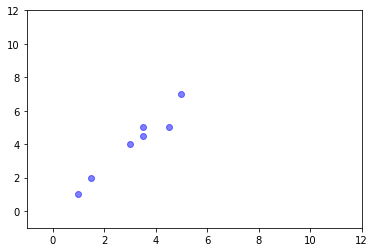

In [7]:
show_plot(group,centroids)

## 3. 거리함수 구현

In [8]:
def euclidean_dist(x, y):
    return np.sqrt(np.sum(np.power(x-y,2)))

## 4. Centroid와의 거리계산

In [9]:
#각각의 점과 각각의 센트로이드와의 거리 계산
distances = {}
for i, centroid in enumerate(centroids) :
    for j, point in enumerate(dataset):
        dis = euclidean_dist(centroid,point)
        if j in distances:
            distances[j].append(dis)
        else:
            distances[j]=[dis]

In [10]:
pprint.pprint(distances)

{0: [1.4142135623730951, 12.727922061357855],
 1: [2.5, 11.672617529928752],
 2: [5.0, 9.219544457292887],
 3: [8.602325267042627, 5.830951894845301],
 4: [6.103277807866851, 8.200609733428363],
 5: [6.726812023536855, 7.433034373659253],
 6: [5.70087712549569, 8.514693182963201]}


## 5. 가까운 센트로이드의 그룹으로 분류

In [11]:
#가까운 거리의 센트로이드 그룹으로 분류
cluster = {}
for i in range(K):
    cluster[i] = []
for point, distance in distances.items():
    close_cent = distance.index(min(distance))
    cluster[close_cent].append(point)

In [12]:
cluster

{0: [0, 1, 2, 4, 5, 6], 1: [3]}

## 6. 분류된 데이터 시각화

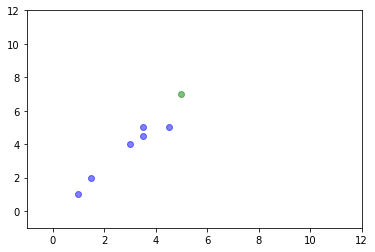

In [13]:
#시각화
group = []

for cls in cluster:
    group.append(dataset[cluster[cls]])
show_plot(group,centroids)

In [14]:
cluster

{0: [0, 1, 2, 4, 5, 6], 1: [3]}

In [15]:
dataset

array([[1. , 1. ],
       [1.5, 2. ],
       [3. , 4. ],
       [5. , 7. ],
       [3.5, 5. ],
       [4.5, 5. ],
       [3.5, 4.5]])

## 7. 센트로이드 업데이트

[[1.  1. ]
 [1.5 2. ]
 [3.  4. ]
 [3.5 5. ]
 [4.5 5. ]
 [3.5 4.5]]
[[5. 7.]]


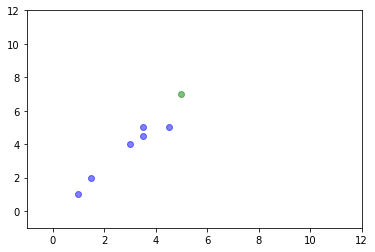

In [16]:
# 센트로이드를 새롭게 업데이트된 그룹에 평균으로 재정의
new_centroids = []
for cls,points in cluster.items():
    print(dataset[points])
    new_x = np.mean(dataset[points,0])
    new_y = np.mean(dataset[points,1])
    new_centroids.append((new_x,new_y))

centroids = np.array(new_centroids)

show_plot(group,centroids)

In [17]:
dataset[cluster[1]]

array([[5., 7.]])

## 8. 두번째 iteration

In [18]:
# 두번째 iteration 
distances = {}
for i, centroid in enumerate(centroids) :
    for j, point in enumerate(dataset):
        dis = euclidean_dist(centroid,point)
        if j in distances:
            distances[j].append(dis)
        else:
            distances[j]=[dis]
            
cluster = {}
for i in range(K):
    cluster[i] = []
for point, distance in distances.items():
    close_cent = distance.index(min(distance))
    cluster[close_cent].append(point)

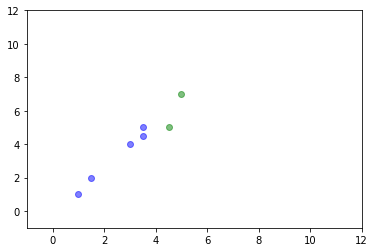

In [19]:
group = []

for cls in cluster:
    group.append(dataset[cluster[cls]])
show_plot(group,centroids)

[[1.  1. ]
 [1.5 2. ]
 [3.  4. ]
 [3.5 5. ]
 [3.5 4.5]]
[[5.  7. ]
 [4.5 5. ]]


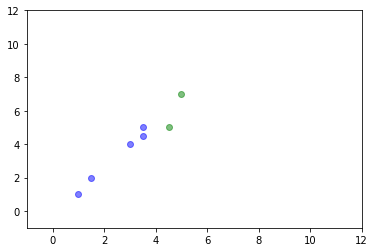

In [20]:
# 센트로이드 재정의
new_centroids = []
for cls,points in cluster.items():
    print(dataset[points])
    new_x = np.mean(dataset[points,0])
    new_y = np.mean(dataset[points,1])
    new_centroids.append((new_x,new_y))

centroids = np.array(new_centroids)

show_plot(group,centroids)

## 9. n번 반복

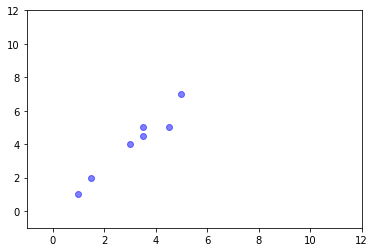

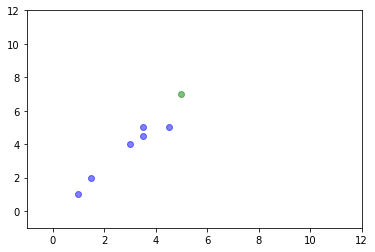

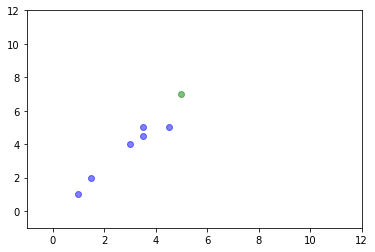

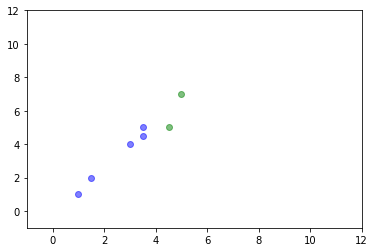

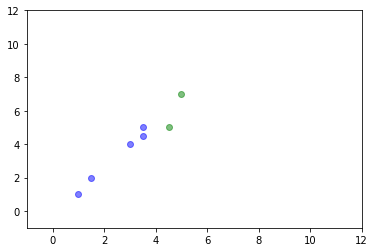

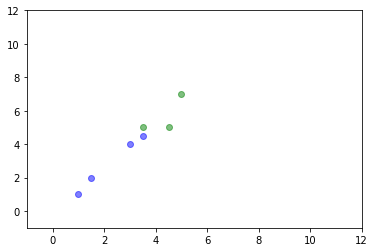

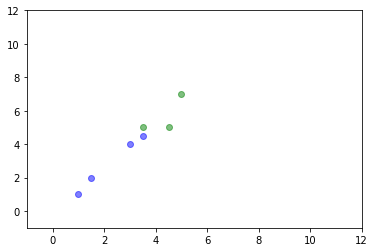

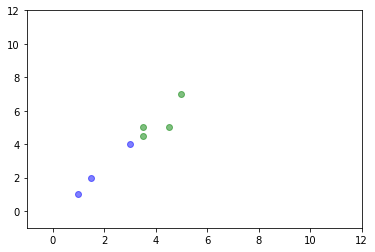

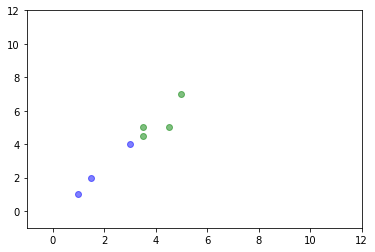

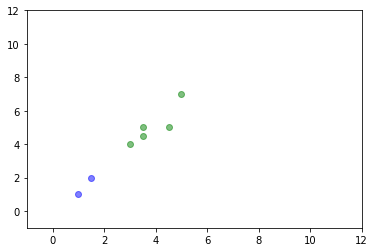

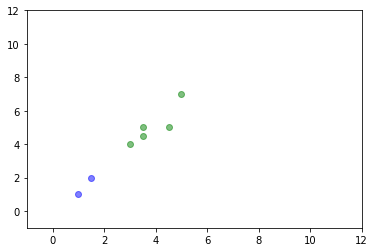

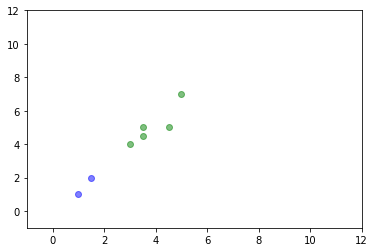

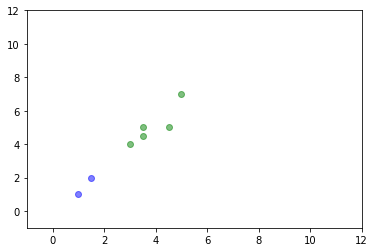

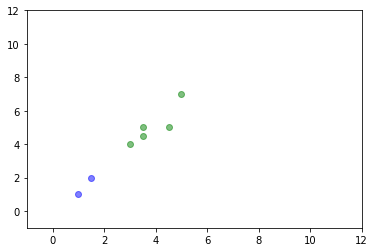

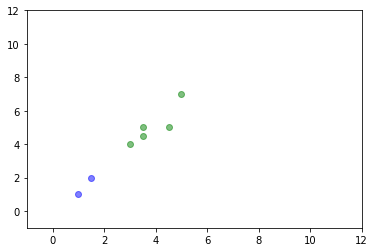

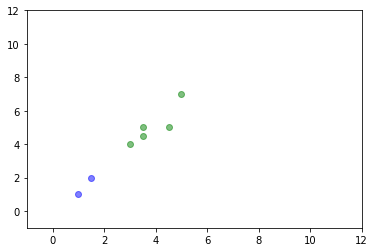

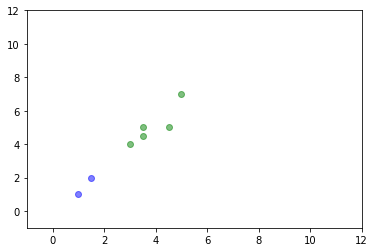

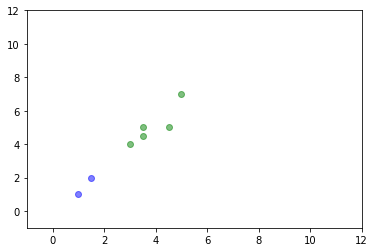

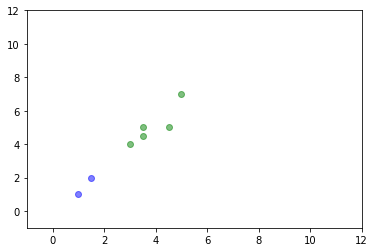

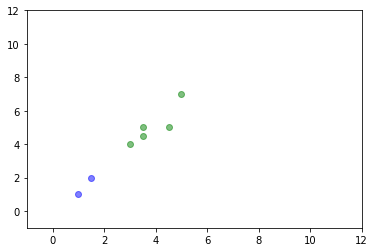

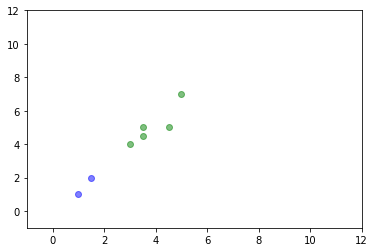

In [21]:
# 위의 과정을 10번 반복
COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
K=2
dataset = np.array([
    [1.0,1.0],
    [1.5,2.0],
    [3.0,4.0],
    [5.0,7.0],
    [3.5,5.0],
    [4.5,5.0],
    [3.5,4.5],
])
centroids = np.array([[0,0],[10,10]])
group = [dataset]
show_plot(group,centroids)
for iteration in range(0,10):
    distances = {}
    for i, centroid in enumerate(centroids) :
        for j, point in enumerate(dataset):
            dis = euclidean_dist(centroid,point)
            if j in distances:
                distances[j].append(dis)
            else:
                distances[j]=[dis]

    cluster = {}
    for i in range(K):
        cluster[i] = []
    for point, distance in distances.items():
        close_cent = distance.index(min(distance))
        cluster[close_cent].append(point)
    group = []

    for cls in cluster:
        group.append(dataset[cluster[cls]])
    show_plot(group,centroids)
    new_centroids = []
    for cls,points in cluster.items():
        new_x = np.mean(dataset[points,0])
        new_y = np.mean(dataset[points,1])
        new_centroids.append((new_x,new_y))

    centroids = np.array(new_centroids)

    show_plot(group,centroids)

In [22]:
#수렴된 센트로이드
centroids

array([[1.25, 1.5 ],
       [3.9 , 5.1 ]])

# Scikit learn 라이브러리 활용

In [23]:
from sklearn.cluster import KMeans
import numpy as np
X = dataset
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
print(kmeans.cluster_centers_)


[[3.9  5.1 ]
 [1.25 1.5 ]]


In [24]:
import sys
sys.version_info

sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)